In [1]:
import sys
sys.path.append('../../')

from src.mesh    import Mesh
from src.problem import Problem
from src.utils   import l2Norm

import json
from sympy import symbols, sin, cos, pi
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np


In [3]:
filePath = "data.json"
with open(filePath, 'r') as file:
    data = json.load(file)

In [4]:
function_str = data['source']
x = symbols('x')
y = symbols('y')
f_expr = eval(function_str, {"sin": sin, "cos": cos, "pi": pi, "x": x, "y": y})
f = lambdify((x, y), f_expr, 'numpy')

In [14]:
data['nx'] = 11;
data['ny'] = 11;
mesh = Mesh(data)

In [15]:
hList = [];
normL2list = [];

In [16]:
for ref in range(0,4):

    # generate mesh
    mesh.refine()

    # assemble problem
    problem = Problem(mesh, data)
    
    # solve linear system
    uh = problem.solveLifting()
    hList.append(mesh.h());
    normL2 = l2Norm(mesh, uh);
    normL2list.append(normL2);
    print("L2 norm: ", normL2);
    

L2 norm:  0.017918871740781803
L2 norm:  0.004532289451324786
L2 norm:  0.0011363981261467912
L2 norm:  0.0002843080524230329


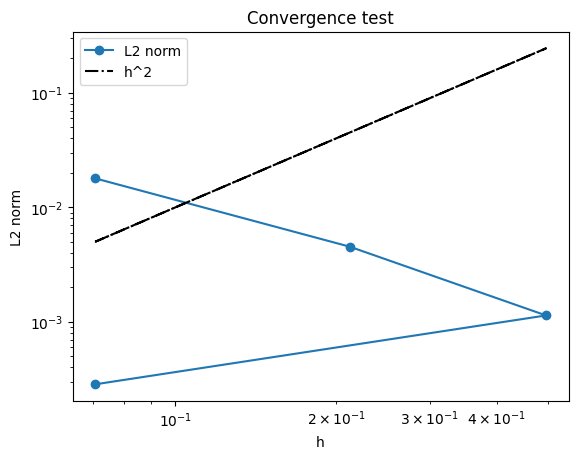

In [9]:
# plot convergence
plt.figure()
plt.loglog(hList, normL2list, '-o')
plt.loglog(hList, np.array(hList)**2, 'k-.')
plt.xlabel('h')
plt.ylabel('L2 norm')
plt.title('Convergence test')
plt.legend(['L2 norm', 'h^2'])
plt.show()

In [10]:
normL2list

[0.017918871740781803,
 0.004532289451324786,
 0.0011363981261467912,
 0.0002843080524230329]

In [17]:
hList

[0.07071067811865477,
 0.2121320343559643,
 0.49497474683058335,
 0.07071067811865477]